In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

# 1.Data Profiling

In [2]:
startup = pd.read_csv(r"C:\Users\HP\1.Myedusolve\3.Machine Learning\Versi Indo\50_Startups.csv")
startup.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# 2.Data Cleansing

The data type is correct and the missing value no longer exists. So, the data can be said to be clean

# 3.Data Exploration

In [5]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


* Maximum Profit : 192 K
* Average profit : 112 K
* Minimum Profit: 14 K

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

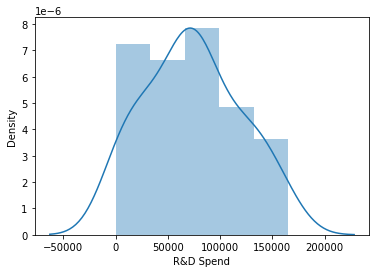

In [6]:
sns.distplot(startup['R&D Spend'])

<AxesSubplot:xlabel='Administration', ylabel='Density'>

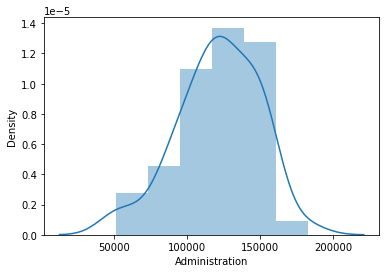

In [7]:
sns.distplot(startup['Administration'])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

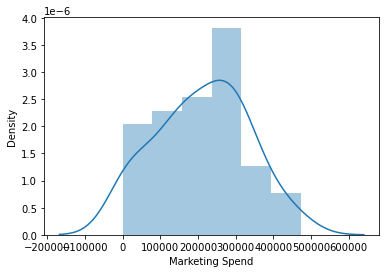

In [8]:
sns.distplot(startup['Marketing Spend'])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

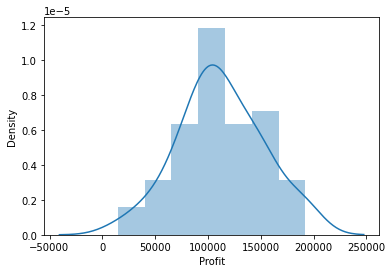

In [9]:
sns.distplot(startup['Profit'])

Text(0.5, 1.0, 'City')

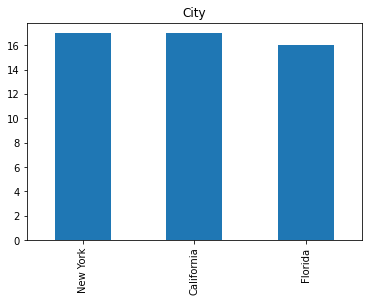

In [10]:
startup['State'].value_counts().plot(kind='bar')
plt.title('City')

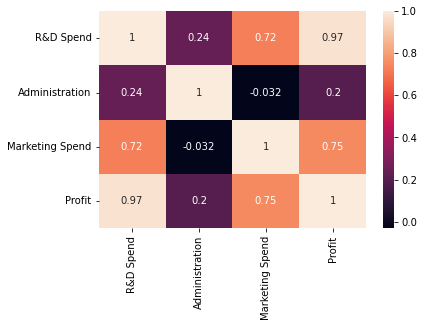

In [11]:
plt.figure(figsize = (6,4))
sns.heatmap(startup.corr(), annot=True);
# There are 3 multicollinear, namely R&D Spend with Profit, R&D Spend with Marketing Spend and Profit with Marketing Spend

In [12]:
startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

# 4.Feature Engineering

In [13]:
# Coloumn State

In [14]:
state_enc = pd.get_dummies(startup['State'], prefix='State', drop_first = False)
startup = startup.drop(['State'], axis = 1)
startup = pd.concat([startup, state_enc], axis = 1)
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [15]:
# MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
startup[['Administration']] = scaler.fit_transform(startup[['Administration']])

## 4.1 Preprocessing Modeling

In [18]:
# multicollinear drop associated with the target variable (Profit)

In [19]:
startup.drop('R&D Spend', axis = 1,inplace = True)
startup.drop('Marketing Spend', axis = 1, inplace = True)

In [20]:
# Feature Importance

In [21]:
x = startup.drop(['Profit'],axis=1)
y = startup['Profit']

In [22]:
x

,Administration,State_California,State_Florida,State_New York
0,0.651744,0,0,1
1,0.761972,1,0,0
2,0.379579,0,1,0
3,0.512998,0,0,1
4,0.305328,0,1,0
5,0.369448,0,0,1
6,0.730161,1,0,0
7,0.717457,0,1,0
8,0.741733,0,0,1
9,0.436929,1,0,0


In [23]:
# define the model
regressor = LinearRegression() # Regressor can be changed to model name or something free

In [24]:
# fit the model
regressor.fit(x,y) 

LinearRegression()

In [25]:
# get importance
importance = regressor.coef_

In [26]:
# summarize feature importance
for i,v in enumerate(importance) :
    print('Feature : %0d, Score : %.5f' % (i,v))

Feature : 0, Score : 35901.33458
Feature : 1, Score : 16633500021522421760.00000
Feature : 2, Score : 16633500021522444288.00000
Feature : 3, Score : 16633500021522436096.00000


<function matplotlib.pyplot.show(close=None, block=None)>

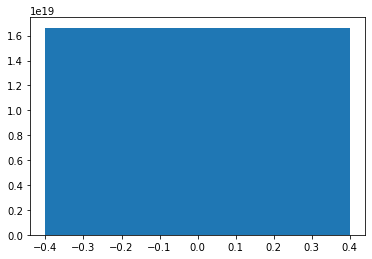

In [27]:
# plot feature importance
plt.bar([x for x in range(len([importance]))], importance)
plt.show

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 42)
# train_size must be greater than random_state.train_size > random_state.
# Using 0.8 because the data contains only 50 rows (small data). So, only 40 tests out of 50.

# 5.Modeling (Machine Learning Regression - Simple Linear Regression)

In [29]:
# define the model
regressor = LinearRegression() # Regressor can be changed to model name or something free

In [30]:
# fit the model
regressor.fit(x_train, y_train) 

LinearRegression()

* Predict The Result

In [31]:
y_pred = regressor.predict(x_test)

* Plot The Result

In [32]:
result = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
result

,Actual,Predict
13,134307.35,105549.396899
39,81005.76,98610.154535
30,99937.59,120394.504355
45,64926.08,122157.809786
17,125370.37,124922.849104
48,35673.41,112589.322599
26,105733.54,124159.890159
25,107404.34,106085.646604
32,97427.84,104720.136440
19,122776.86,126037.680644


<function matplotlib.pyplot.show(close=None, block=None)>

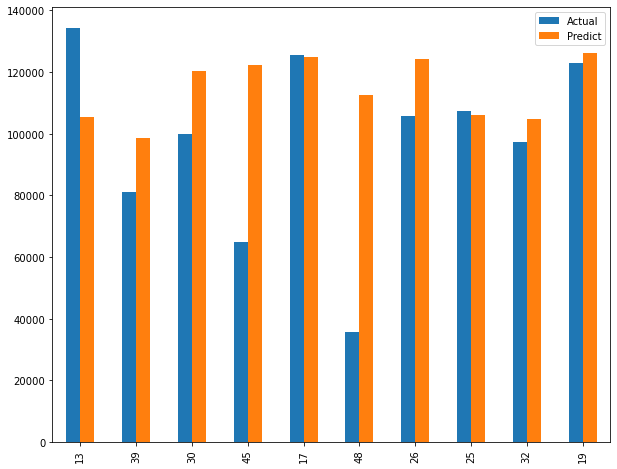

In [33]:
result.plot(kind = 'bar',figsize = (10,8))
plt.show

# 6.Evaluate Model

In [34]:
# View the average error
mean_absolute_error(y_test, y_pred)

23171.258591031405

In [35]:
# Determine whether the error is large or small
mean_absolute_percentage_error(y_test,y_pred)

0.3965270093583587